In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import geopandas as gpd
from fiona.crs import from_epsg
import geopandas as gpd
import os
import pandas as pd
import re

In [3]:
# 1. 나눔 폰트 다운
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [4]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [5]:
df6 = pd.read_csv('/content/drive/MyDrive/new_project1/data/complete/동별 노인복지시설 개수 최종.csv')

In [6]:
df6

,자치구,법정동,노인복지시설 개수,code10
0,강남구,개포1동,8,1168066000
1,강남구,개포2동,8,1168067000
2,강남구,개포3동,8,1168067500
3,강남구,개포4동,8,1168069000
4,강남구,논현1동,5,1168052100
...,...,...,...,...
425,중랑구,상봉제2동,9,1126059000
426,중랑구,신내1동,12,1126068000
427,중랑구,신내2동,12,1126069000
428,중랑구,중화제1동,13,1126060000


In [7]:
df6 = df6.rename(columns={'시군구명': '자치구', '읍면동명': '행정동명'})

In [8]:
df6['자치구'] = df6['자치구'].str.replace('서울특별시 ', '')

In [9]:
df6.rename(columns={'자치구': '시군구', '법정동': '읍면동'}, inplace=True)

In [10]:
df6.drop(columns='code10', inplace=True)

In [11]:
filtered_data = df6[df6['읍면동'].str.contains('\.') | df6['읍면동'].str.contains('·')]

In [12]:
df6['읍면동'] = df6['읍면동'].apply(lambda x: re.sub(r'[·.]', '', x))
df6[df6['읍면동'].str.contains('[·.]')]

,시군구,읍면동,노인복지시설 개수


In [13]:
dong_shp = gpd.read_file('/content/drive/MyDrive/new_project1/data/seoul_shp/dong/bnd_dong_11_2023_2023_2Q.shp')
dong_shp.head()

,BASE_DATE,ADM_NM,ADM_CD,geometry
0,20230701,사직동,11010530,"POLYGON ((953553.932 1953335.741, 953555.211 1..."
1,20230701,삼청동,11010540,"POLYGON ((954025.242 1953916.389, 954026.972 1..."
2,20230701,부암동,11010550,"POLYGON ((952490.380 1956548.821, 952497.594 1..."
3,20230701,평창동,11010560,"POLYGON ((953683.828 1959209.871, 953665.283 1..."
4,20230701,한남동,11030740,"POLYGON ((956238.296 1950166.610, 956237.942 1..."


In [14]:
df6['구동'] = df6['시군구'] + ' ' +df6['읍면동']
df6.head()

,시군구,읍면동,노인복지시설 개수,구동
0,강남구,개포1동,8,강남구 개포1동
1,강남구,개포2동,8,강남구 개포2동
2,강남구,개포3동,8,강남구 개포3동
3,강남구,개포4동,8,강남구 개포4동
4,강남구,논현1동,5,강남구 논현1동


In [15]:
df6['노인복지시설 개수'] = df6['노인복지시설 개수'].apply(lambda x: 0 if x =='-' else x)
df6['노인복지시설 개수'] = df6['노인복지시설 개수'].apply(lambda x: int(x))
df6['노인복지시설 개수'].unique()

array([ 8,  5,  2,  1,  3,  4,  7,  6, 21, 16, 38, 11, 31, 28, 40, 13,  9,
       10, 14, 47, 25, 19, 17, 20, 15, 33, 12])

In [16]:
df6 = df6[['구동', '노인복지시설 개수']]
df6

,구동,노인복지시설 개수
0,강남구 개포1동,8
1,강남구 개포2동,8
2,강남구 개포3동,8
3,강남구 개포4동,8
4,강남구 논현1동,5
...,...,...
425,중랑구 상봉제2동,9
426,중랑구 신내1동,12
427,중랑구 신내2동,12
428,중랑구 중화제1동,13


In [17]:
dong_shp['ADM_CD'] = dong_shp['ADM_CD'].astype('O')

In [18]:
dong_shp[dong_shp['ADM_NM'] == '길동']

,BASE_DATE,ADM_NM,ADM_CD,geometry
416,20230701,길동,11250740,"POLYGON ((968944.218 1949625.263, 968943.832 1..."


In [19]:
df6[df6['구동'] == '강동구 길동']

,구동,노인복지시설 개수
30,강동구 길동,8


In [20]:
region_code = pd.read_csv('/content/drive/MyDrive/new_project1/data/complete/region_code.csv')
region_code.head()

,ADM_CD,dong_name,통계청코드,도로명코드10,통계청코드8,도로명코드8,도로명코드,시도명,시군구,읍면동
0,11010530,서울특별시 종로구 사직동,1101053,1111053000,11010530,11110530,11110530,서울특별시,종로구,사직동
1,11010540,서울특별시 종로구 삼청동,1101054,1111054000,11010540,11110540,11110540,서울특별시,종로구,삼청동
2,11010550,서울특별시 종로구 부암동,1101055,1111055000,11010550,11110550,11110550,서울특별시,종로구,부암동
3,11010560,서울특별시 종로구 평창동,1101056,1111056000,11010560,11110560,11110560,서울특별시,종로구,평창동
4,11030740,서울특별시 용산구 한남동,1103074,1117068500,11030740,11170685,11170685,서울특별시,용산구,한남동


In [21]:
dong_shp['ADM_CD'] = dong_shp['ADM_CD'].astype('int')

In [22]:
region_code['ADM_CD'] = region_code['ADM_CD'].astype('int')

In [23]:
map_base = dong_shp.merge(region_code,
                          how = 'left',
                          on = 'ADM_CD')
map_base.head()

,BASE_DATE,ADM_NM,ADM_CD,geometry,dong_name,통계청코드,도로명코드10,통계청코드8,도로명코드8,도로명코드,시도명,시군구,읍면동
0,20230701,사직동,11010530,"POLYGON ((953553.932 1953335.741, 953555.211 1...",서울특별시 종로구 사직동,1101053,1111053000,11010530,11110530,11110530,서울특별시,종로구,사직동
1,20230701,삼청동,11010540,"POLYGON ((954025.242 1953916.389, 954026.972 1...",서울특별시 종로구 삼청동,1101054,1111054000,11010540,11110540,11110540,서울특별시,종로구,삼청동
2,20230701,부암동,11010550,"POLYGON ((952490.380 1956548.821, 952497.594 1...",서울특별시 종로구 부암동,1101055,1111055000,11010550,11110550,11110550,서울특별시,종로구,부암동
3,20230701,평창동,11010560,"POLYGON ((953683.828 1959209.871, 953665.283 1...",서울특별시 종로구 평창동,1101056,1111056000,11010560,11110560,11110560,서울특별시,종로구,평창동
4,20230701,한남동,11030740,"POLYGON ((956238.296 1950166.610, 956237.942 1...",서울특별시 용산구 한남동,1103074,1117068500,11030740,11170685,11170685,서울특별시,용산구,한남동


In [24]:
map_base['ADM_NM'] = map_base['ADM_NM'].apply(lambda x: re.sub(r'\·', '', x))

In [25]:
map_base['key1'] = map_base['시군구'] + ' ' + map_base['ADM_NM']
map_base['key2'] = map_base['시군구'] + ' ' + map_base['읍면동']

In [26]:
map_base[['key1', 'key2']]

,key1,key2
0,종로구 사직동,종로구 사직동
1,종로구 삼청동,종로구 삼청동
2,종로구 부암동,종로구 부암동
3,종로구 평창동,종로구 평창동
4,용산구 한남동,용산구 한남동
...,...,...
421,종로구 가회동,종로구 가회동
422,종로구 종로1234가동,종로구 종로1234가동
423,서초구 방배2동,서초구 방배2동
424,강북구 미아동,강북구 미아동


In [27]:
final = map_base.merge(df6.rename(columns = {'구동' : 'key2'}),
                       how = 'left',
                       on = 'key2')
final

,BASE_DATE,ADM_NM,ADM_CD,geometry,dong_name,통계청코드,도로명코드10,통계청코드8,도로명코드8,도로명코드,시도명,시군구,읍면동,key1,key2,노인복지시설 개수
0,20230701,사직동,11010530,"POLYGON ((953553.932 1953335.741, 953555.211 1...",서울특별시 종로구 사직동,1101053,1111053000,11010530,11110530,11110530,서울특별시,종로구,사직동,종로구 사직동,종로구 사직동,1.0
1,20230701,삼청동,11010540,"POLYGON ((954025.242 1953916.389, 954026.972 1...",서울특별시 종로구 삼청동,1101054,1111054000,11010540,11110540,11110540,서울특별시,종로구,삼청동,종로구 삼청동,종로구 삼청동,NaN
2,20230701,부암동,11010550,"POLYGON ((952490.380 1956548.821, 952497.594 1...",서울특별시 종로구 부암동,1101055,1111055000,11010550,11110550,11110550,서울특별시,종로구,부암동,종로구 부암동,종로구 부암동,1.0
3,20230701,부암동,11010550,"POLYGON ((952490.380 1956548.821, 952497.594 1...",서울특별시 종로구 부암동,1101055,1111055000,11010550,11110550,11110550,서울특별시,종로구,부암동,종로구 부암동,종로구 부암동,1.0
4,20230701,평창동,11010560,"POLYGON ((953683.828 1959209.871, 953665.283 1...",서울특별시 종로구 평창동,1101056,1111056000,11010560,11110560,11110560,서울특별시,종로구,평창동,종로구 평창동,종로구 평창동,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,20230701,종로1234가동,11010610,"POLYGON ((954918.389 1954371.538, 954926.411 1...",서울특별시 종로구 종로1·2·3·4가동,1101061,1111061500,11010610,11110615,11110615,서울특별시,종로구,종로1234가동,종로구 종로1234가동,종로구 종로1234가동,1.0
474,20230701,종로1234가동,11010610,"POLYGON ((954918.389 1954371.538, 954926.411 1...",서울특별시 종로구 종로1·2·3·4가동,1101061,1111061500,11010610,11110615,11110615,서울특별시,종로구,종로1234가동,종로구 종로1234가동,종로구 종로1234가동,1.0
475,20230701,방배2동,11220630,"POLYGON ((954967.724 1942969.970, 954985.115 1...",서울특별시 서초구 방배2동,1122063,1165061000,11220630,11650610,11650610,서울특별시,서초구,방배2동,서초구 방배2동,서초구 방배2동,4.0
476,20230701,미아동,11090700,"POLYGON ((958301.054 1959603.612, 958292.609 1...",서울특별시 강북구 미아동,1109070,1130553500,11090700,11305535,11305535,서울특별시,강북구,미아동,강북구 미아동,강북구 미아동,21.0


In [28]:
final[final['노인복지시설 개수'].isna()]

,BASE_DATE,ADM_NM,ADM_CD,geometry,dong_name,통계청코드,도로명코드10,통계청코드8,도로명코드8,도로명코드,시도명,시군구,읍면동,key1,key2,노인복지시설 개수
1,20230701,삼청동,11010540,"POLYGON ((954025.242 1953916.389, 954026.972 1...",서울특별시 종로구 삼청동,1101054,1111054000,11010540,11110540,11110540,서울특별시,종로구,삼청동,종로구 삼청동,종로구 삼청동,NaN
7,20230701,왕십리2동,11040520,"POLYGON ((958262.940 1951830.159, 958266.662 1...",서울특별시 성동구 왕십리2동,1104052,1120052000,11040520,11200520,11200520,서울특별시,성동구,왕십리제2동,성동구 왕십리2동,성동구 왕십리제2동,NaN
12,20230701,광희동,11020590,"POLYGON ((956729.541 1952329.805, 956729.702 1...",서울특별시 중구 광희동,1102059,1114059000,11020590,11140590,11140590,서울특별시,중구,광희동,중구 광희동,중구 광희동,NaN
15,20230701,후암동,11030510,"POLYGON ((953957.541 1950559.882, 953957.617 1...",서울특별시 용산구 후암동,1103051,1117051000,11030510,11170510,11170510,서울특별시,용산구,후암동,용산구 후암동,용산구 후암동,NaN
16,20230701,용산2가동,11030520,"POLYGON ((954841.519 1950365.382, 954877.522 1...",서울특별시 용산구 용산2가동,1103052,1117052000,11030520,11170520,11170520,서울특별시,용산구,용산2가동,용산구 용산2가동,용산구 용산2가동,NaN
21,20230701,용문동,11030590,"POLYGON ((952019.866 1949157.961, 952023.200 1...",서울특별시 용산구 용문동,1103059,1117059000,11030590,11170590,11170590,서울특별시,용산구,용문동,용산구 용문동,용산구 용문동,NaN
22,20230701,이태원1동,11030650,"POLYGON ((955410.047 1948935.995, 955409.070 1...",서울특별시 용산구 이태원1동,1103065,1117065000,11030650,11170650,11170650,서울특별시,용산구,이태원제1동,용산구 이태원1동,용산구 이태원제1동,NaN
23,20230701,금호1가동,11040590,"POLYGON ((957995.226 1951055.874, 958009.406 1...",서울특별시 성동구 금호1가동,1104059,1120059000,11040590,11200590,11200590,서울특별시,성동구,금호1가동,성동구 금호1가동,성동구 금호1가동,NaN
24,20230701,금호4가동,11040620,"POLYGON ((958448.722 1950031.340, 958451.487 1...",서울특별시 성동구 금호4가동,1104062,1120062000,11040620,11200620,11200620,서울특별시,성동구,금호4가동,성동구 금호4가동,성동구 금호4가동,NaN
25,20230701,성수1가1동,11040650,"POLYGON ((959296.012 1949836.447, 959297.968 1...",서울특별시 성동구 성수1가1동,1104065,1120065000,11040650,11200650,11200650,서울특별시,성동구,성수1가제1동,성동구 성수1가1동,성동구 성수1가제1동,NaN


In [29]:
final['노인복지시설 개수'] = final['노인복지시설 개수'].fillna(0)

In [30]:
final[final['노인복지시설 개수'].isna()]

,BASE_DATE,ADM_NM,ADM_CD,geometry,dong_name,통계청코드,도로명코드10,통계청코드8,도로명코드8,도로명코드,시도명,시군구,읍면동,key1,key2,노인복지시설 개수


In [31]:
duplicates = final[final['ADM_NM'].duplicated(keep=False)]

In [32]:
print(duplicates)

    BASE_DATE    ADM_NM    ADM_CD  \
2    20230701       부암동  11010550   
3    20230701       부암동  11010550   
4    20230701       평창동  11010560   
5    20230701       평창동  11010560   
13   20230701       사근동  11040550   
..        ...       ...       ...   
438  20230701      개포2동  11230800   
449  20230701      문정2동  11240690   
450  20230701      문정2동  11240690   
473  20230701  종로1234가동  11010610   
474  20230701  종로1234가동  11010610   

                                              geometry              dong_name  \
2    POLYGON ((952490.380 1956548.821, 952497.594 1...          서울특별시 종로구 부암동   
3    POLYGON ((952490.380 1956548.821, 952497.594 1...          서울특별시 종로구 부암동   
4    POLYGON ((953683.828 1959209.871, 953665.283 1...          서울특별시 종로구 평창동   
5    POLYGON ((953683.828 1959209.871, 953665.283 1...          서울특별시 종로구 평창동   
13   POLYGON ((960102.858 1951876.095, 960114.175 1...          서울특별시 성동구 사근동   
..                                                 ...               

In [33]:
final_result = final.groupby('읍면동').agg({
    '노인복지시설 개수': 'sum',  # 노인복지시설 개수는 합계
    'BASE_DATE': 'first',      # 나머지 필드는 첫 번째 값
    'ADM_NM': 'first',
    'ADM_CD': 'first',
    'geometry': 'first',
    'dong_name': 'first',
    '통계청코드': 'first',
    '도로명코드10': 'first',
    '통계청코드8': 'first',
    '도로명코드8': 'first',
    '도로명코드': 'first',
    '시도명': 'first',
    '시군구': 'first',
    'key1': 'first',
    'key2': 'first'
}).reset_index()

final_result

,읍면동,노인복지시설 개수,BASE_DATE,ADM_NM,ADM_CD,geometry,dong_name,통계청코드,도로명코드10,통계청코드8,도로명코드8,도로명코드,시도명,시군구,key1,key2
0,가락1동,7.0,20230701,가락1동,11240660,"POLYGON ((965581.891 1944598.810, 965593.406 1...",서울특별시 송파구 가락1동,1124066,1171063100,11240660,11710631,11710631,서울특별시,송파구,송파구 가락1동,송파구 가락1동
1,가락2동,7.0,20230701,가락2동,11240670,"POLYGON ((968121.746 1944104.785, 968110.390 1...",서울특별시 송파구 가락2동,1124067,1171063200,11240670,11710632,11710632,서울특별시,송파구,송파구 가락2동,송파구 가락2동
2,가락본동,7.0,20230701,가락본동,11240650,"POLYGON ((966900.987 1943741.652, 966915.155 1...",서울특별시 송파구 가락본동,1124065,1171062000,11240650,11710620,11710620,서울특별시,송파구,송파구 가락본동,송파구 가락본동
3,가리봉동,1.0,20230701,가리봉동,11170700,"POLYGON ((945240.192 1943315.095, 945240.871 1...",서울특별시 구로구 가리봉동,1117070,1153059500,11170700,11530595,11530595,서울특별시,구로구,구로구 가리봉동,구로구 가리봉동
4,가산동,3.0,20230701,가산동,11180510,"POLYGON ((945134.075 1943182.190, 945138.213 1...",서울특별시 금천구 가산동,1118051,1154551000,11180510,11545510,11545510,서울특별시,금천구,금천구 가산동,금천구 가산동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,효창동,2.0,20230701,효창동,11030580,"POLYGON ((952104.616 1949681.070, 952108.401 1...",서울특별시 용산구 효창동,1103058,1117058000,11030580,11170580,11170580,서울특별시,용산구,용산구 효창동,용산구 효창동
420,후암동,0.0,20230701,후암동,11030510,"POLYGON ((953957.541 1950559.882, 953957.617 1...",서울특별시 용산구 후암동,1103051,1117051000,11030510,11170510,11170510,서울특별시,용산구,용산구 후암동,용산구 후암동
421,휘경제1동,3.0,20230701,휘경1동,11060720,"POLYGON ((961617.970 1955195.988, 961617.291 1...",서울특별시 동대문구 휘경1동,1106072,1123072000,11060720,11230720,11230720,서울특별시,동대문구,동대문구 휘경1동,동대문구 휘경제1동
422,휘경제2동,3.0,20230701,휘경2동,11060730,"POLYGON ((962179.971 1954375.052, 962193.343 1...",서울특별시 동대문구 휘경2동,1106073,1123073000,11060730,11230730,11230730,서울특별시,동대문구,동대문구 휘경2동,동대문구 휘경제2동


In [34]:
final_result = final.groupby(['BASE_DATE', 'ADM_NM', 'ADM_CD', 'geometry', 'dong_name', '통계청코드', '도로명코드10', '통계청코드8', '도로명코드8', '도로명코드', '시도명', '시군구', '읍면동', 'key1', 'key2']).agg({'노인복지시설 개수': 'sum'}).reset_index()

In [35]:
final_result

,BASE_DATE,ADM_NM,ADM_CD,geometry,dong_name,통계청코드,도로명코드10,통계청코드8,도로명코드8,도로명코드,시도명,시군구,읍면동,key1,key2,노인복지시설 개수
0,20230701,가락1동,11240660,"POLYGON ((965581.891 1944598.810, 965593.406 1...",서울특별시 송파구 가락1동,1124066,1171063100,11240660,11710631,11710631,서울특별시,송파구,가락1동,송파구 가락1동,송파구 가락1동,7.0
1,20230701,가락2동,11240670,"POLYGON ((968121.746 1944104.785, 968110.390 1...",서울특별시 송파구 가락2동,1124067,1171063200,11240670,11710632,11710632,서울특별시,송파구,가락2동,송파구 가락2동,송파구 가락2동,7.0
2,20230701,가락본동,11240650,"POLYGON ((966900.987 1943741.652, 966915.155 1...",서울특별시 송파구 가락본동,1124065,1171062000,11240650,11710620,11710620,서울특별시,송파구,가락본동,송파구 가락본동,송파구 가락본동,7.0
3,20230701,가리봉동,11170700,"POLYGON ((945240.192 1943315.095, 945240.871 1...",서울특별시 구로구 가리봉동,1117070,1153059500,11170700,11530595,11530595,서울특별시,구로구,가리봉동,구로구 가리봉동,구로구 가리봉동,1.0
4,20230701,가산동,11180510,"POLYGON ((945134.075 1943182.190, 945138.213 1...",서울특별시 금천구 가산동,1118051,1154551000,11180510,11545510,11545510,서울특별시,금천구,가산동,금천구 가산동,금천구 가산동,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,20230701,효창동,11030580,"POLYGON ((952104.616 1949681.070, 952108.401 1...",서울특별시 용산구 효창동,1103058,1117058000,11030580,11170580,11170580,서울특별시,용산구,효창동,용산구 효창동,용산구 효창동,2.0
422,20230701,후암동,11030510,"POLYGON ((953957.541 1950559.882, 953957.617 1...",서울특별시 용산구 후암동,1103051,1117051000,11030510,11170510,11170510,서울특별시,용산구,후암동,용산구 후암동,용산구 후암동,0.0
423,20230701,휘경1동,11060720,"POLYGON ((961617.970 1955195.988, 961617.291 1...",서울특별시 동대문구 휘경1동,1106072,1123072000,11060720,11230720,11230720,서울특별시,동대문구,휘경제1동,동대문구 휘경1동,동대문구 휘경제1동,3.0
424,20230701,휘경2동,11060730,"POLYGON ((962179.971 1954375.052, 962193.343 1...",서울특별시 동대문구 휘경2동,1106073,1123073000,11060730,11230730,11230730,서울특별시,동대문구,휘경제2동,동대문구 휘경2동,동대문구 휘경제2동,3.0


In [36]:
final_result['노인복지시설 개수'] = final_result['노인복지시설 개수'].astype(int)

# 결과 확인
print(final_result)

    BASE_DATE ADM_NM    ADM_CD  \
0    20230701   가락1동  11240660   
1    20230701   가락2동  11240670   
2    20230701   가락본동  11240650   
3    20230701   가리봉동  11170700   
4    20230701    가산동  11180510   
..        ...    ...       ...   
421  20230701    효창동  11030580   
422  20230701    후암동  11030510   
423  20230701   휘경1동  11060720   
424  20230701   휘경2동  11060730   
425  20230701    흑석동  11200710   

                                              geometry        dong_name  \
0    POLYGON ((965581.891 1944598.810, 965593.406 1...   서울특별시 송파구 가락1동   
1    POLYGON ((968121.746 1944104.785, 968110.390 1...   서울특별시 송파구 가락2동   
2    POLYGON ((966900.987 1943741.652, 966915.155 1...   서울특별시 송파구 가락본동   
3    POLYGON ((945240.192 1943315.095, 945240.871 1...   서울특별시 구로구 가리봉동   
4    POLYGON ((945134.075 1943182.190, 945138.213 1...    서울특별시 금천구 가산동   
..                                                 ...              ...   
421  POLYGON ((952104.616 1949681.070, 952108.401 1...    서울특별시 용산

In [37]:
final_result

,BASE_DATE,ADM_NM,ADM_CD,geometry,dong_name,통계청코드,도로명코드10,통계청코드8,도로명코드8,도로명코드,시도명,시군구,읍면동,key1,key2,노인복지시설 개수
0,20230701,가락1동,11240660,"POLYGON ((965581.891 1944598.810, 965593.406 1...",서울특별시 송파구 가락1동,1124066,1171063100,11240660,11710631,11710631,서울특별시,송파구,가락1동,송파구 가락1동,송파구 가락1동,7
1,20230701,가락2동,11240670,"POLYGON ((968121.746 1944104.785, 968110.390 1...",서울특별시 송파구 가락2동,1124067,1171063200,11240670,11710632,11710632,서울특별시,송파구,가락2동,송파구 가락2동,송파구 가락2동,7
2,20230701,가락본동,11240650,"POLYGON ((966900.987 1943741.652, 966915.155 1...",서울특별시 송파구 가락본동,1124065,1171062000,11240650,11710620,11710620,서울특별시,송파구,가락본동,송파구 가락본동,송파구 가락본동,7
3,20230701,가리봉동,11170700,"POLYGON ((945240.192 1943315.095, 945240.871 1...",서울특별시 구로구 가리봉동,1117070,1153059500,11170700,11530595,11530595,서울특별시,구로구,가리봉동,구로구 가리봉동,구로구 가리봉동,1
4,20230701,가산동,11180510,"POLYGON ((945134.075 1943182.190, 945138.213 1...",서울특별시 금천구 가산동,1118051,1154551000,11180510,11545510,11545510,서울특별시,금천구,가산동,금천구 가산동,금천구 가산동,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,20230701,효창동,11030580,"POLYGON ((952104.616 1949681.070, 952108.401 1...",서울특별시 용산구 효창동,1103058,1117058000,11030580,11170580,11170580,서울특별시,용산구,효창동,용산구 효창동,용산구 효창동,2
422,20230701,후암동,11030510,"POLYGON ((953957.541 1950559.882, 953957.617 1...",서울특별시 용산구 후암동,1103051,1117051000,11030510,11170510,11170510,서울특별시,용산구,후암동,용산구 후암동,용산구 후암동,0
423,20230701,휘경1동,11060720,"POLYGON ((961617.970 1955195.988, 961617.291 1...",서울특별시 동대문구 휘경1동,1106072,1123072000,11060720,11230720,11230720,서울특별시,동대문구,휘경제1동,동대문구 휘경1동,동대문구 휘경제1동,3
424,20230701,휘경2동,11060730,"POLYGON ((962179.971 1954375.052, 962193.343 1...",서울특별시 동대문구 휘경2동,1106073,1123073000,11060730,11230730,11230730,서울특별시,동대문구,휘경제2동,동대문구 휘경2동,동대문구 휘경제2동,3


In [38]:
duplicates = final_result[final_result['ADM_NM'].duplicated(keep=False)]

In [39]:
print(duplicates)

    BASE_DATE ADM_NM    ADM_CD  \
246  20230701    신사동  11210680   
247  20230701    신사동  11230510   

                                              geometry      dong_name  \
246  POLYGON ((948318.355 1942686.324, 948238.225 1...  서울특별시 관악구 신사동   
247  POLYGON ((957731.011 1948575.766, 957965.468 1...  서울특별시 강남구 신사동   

       통계청코드     도로명코드10    통계청코드8    도로명코드8     도로명코드    시도명  시군구  읍면동  \
246  1121068  1162068500  11210680  11620685  11620685  서울특별시  관악구  신사동   
247  1123051  1168051000  11230510  11680510  11680510  서울특별시  강남구  신사동   

        key1     key2  노인복지시설 개수  
246  관악구 신사동  관악구 신사동         40  
247  강남구 신사동  강남구 신사동          4  


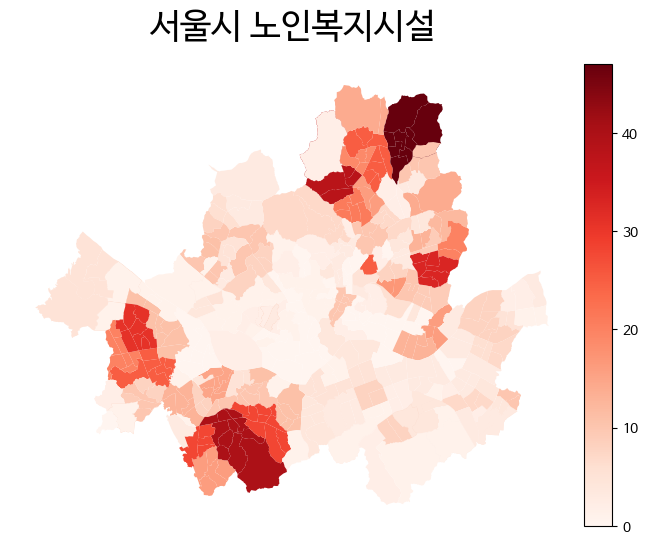

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(12, 6))
ax = fig.subplots(1, 1)

# Adding legend
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Choropleth map
final.plot(column="노인복지시설 개수", ax=ax, legend=True, cax=cax, cmap='Reds')
ax.set_title("서울시 노인복지시설", fontsize=25, pad=20)

ax.axis('off')
#plt.savefig('전체.jpg', format='jpeg')
plt.show()

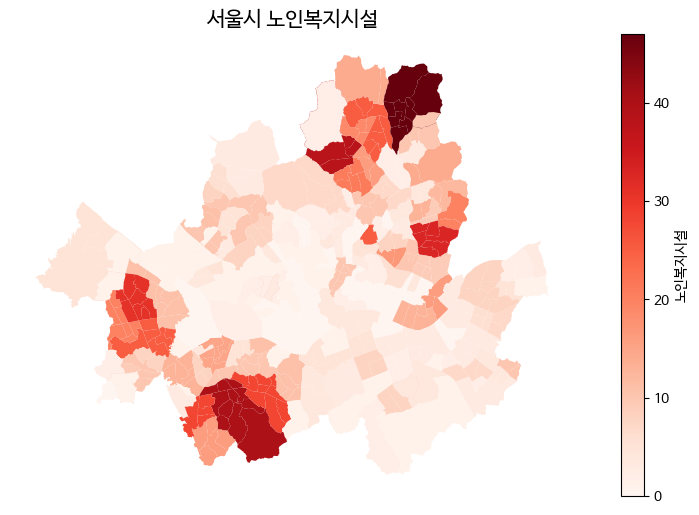

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# 전체 지도 색칠
final.plot(ax=ax, column='노인복지시설 개수', cmap='Reds', legend=True, legend_kwds={'label': "노인복지시설"})


ax.set_title('서울시 노인복지시설', fontsize=15)
ax.axis('off')

plt.show()

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [44]:
final_result.to_csv('/content/drive/MyDrive/new_project1/data/complete/cho2.csv', index=False, encoding='utf-8-sig')